In [6]:
# Alias dictionary
alias_dict = {}
with open("rappers.txt", 'r') as file:
    for line in file:
        # Split line into primary name and aliases
        parts = line.strip().split(';')
        primary_name = parts[0].strip()  # The first part is the primary name
        aliases = [alias.strip() for alias in parts[1:]]  # The rest are aliases
        alias_dict[primary_name] = aliases

alias_dict


{'070 Shake': [],
 '2 Chainz': [],
 '21 Savage': ['Savage'],
 '50 Cent': [],
 '6ix9ine': [],
 '6lack': [],
 '88-Keys': [],
 'Ab-Soul': [],
 'A Boogie wit da Hoodie': [],
 'Abstract Rude': [],
 'Ace Hood': [],
 'Aceyalone': [],
 'Action Bronson': [],
 'Adam Saleh': [],
 'Aesop Rock': [],
 'Afrika Bambaataa': [],
 'Afroman': [],
 'Afu-Ra': [],
 'Agallah': [],
 'Ahmad': [],
 'Ajs Nigrutin': [],
 'AJ Tracey': [],
 'Akala': [],
 'Akinyele': [],
 'Akir': [],
 'Akiva Schaffer': [],
 'Akon': [],
 'Akrobatik': [],
 'Ak’Sent': [],
 'Akwid': [],
 'The Alchemist': ['Uncle Al', 'Alchemist'],
 'Alex Wiley': [],
 'Ali Jones': [],
 'Ali Vegas': [],
 'Aloe Blacc': [],
 'A.L.T.': [],
 'AMG': [],
 'Amil': [],
 'Aminé': [],
 'Amir Obè': [],
 'Ampichino': [],
 'Anderson .Paak': [],
 'Andre 3000': ['André', 'Andre', 'Andre 3K', '3 Stacks', '3K'],
 'Andre Nickatina': [],
 'Andy Mineo': [],
 'Andy Samberg': [],
 'Angel Haze': [],
 'Angie Martinez': [],
 'Anotha Level': [],
 'Ant Banks': [],
 'Anthony Parker':

In [9]:
# Letra da música como texto
import json

with open("./letras/Lyrics_JAY-Z.json", 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract lyrics from each song entry
lyrics_list = [song['lyrics'] for song in data['songs']]

# Combine all lyrics into a single text for processing, if needed
lyrics = " ".join(lyrics_list)

# Remove backslashes
# lyrics = lyrics.replace('\\', '')
# lyrics = lyrics.replace('\n', '\n')
# lyrics = lyrics.replace("\'", "'")

# Strip leading and trailing spaces
lyrics = lyrics.strip()

lyrics


'327 ContributorsTranslationsFrançaisHoly Grail Lyrics\nYou\'d take the clothes off my back and I\'d let you (Yeah)\nYou\'d steal the food right out my mouth and I\'d watch you eat it\nI still don\'t know why (Yeah)\nWhy I love it so much (Thanks for warning me; yeah)\nOh (Thanks for warning me; yeah)\nYou curse my name in spite to put me to shame (Yeah)\nHang my laundry in the streets, dirty or clean, give it up for fame (Yeah)\nBut I still don\'t know why (Don\'t know why)\nWhy I love it so much (Thanks for warning me; yeah, yeah)\nYeah (Thanks for warning me; yeah, yeah)\n\nAnd, baby, it\'s amazin\' I\'m in this maze with you\nI just can\'t crack your code\nOne day, you\'re screamin\' you love me loud\nThe next day, you\'re so cold\nOne day, you\'re here (Yeah), one day, you\'re there (Yeah)\nOne day, you care (Yeah), you\'re so unfair\nSippin\' from your cup \'til it runneth over (Uh, uh; yeah)\nHoly Grail\nUh, Blue told me remind you niggas, uh\nFuck that shit y\'all talkin\' \'bo

In [10]:
# Com debug, mostra as linhas que identificou o nome de outro rapper

import re

# Convert alias mappings to a form suitable for matching. No need for lowercasing now as we match capitalized words.
alias_to_primary = {
    primary: primary for primary in alias_dict
}
for primary, alias_list in alias_dict.items():
    alias_to_primary.update({alias: primary for alias in alias_list})

# Split lyrics into lines for processing
lyrics_lines = lyrics.splitlines()

found_rappers_with_context = {}

# Check each line for rapper names
for i, line in enumerate(lyrics_lines):

    # Find capitalized words using regex
    words = re.findall(r'\b[A-Z][a-z]*\b', line)

    for word in words:
        if word in alias_to_primary:
            primary_name = alias_to_primary[word]

            # Capture 2 lines of context before and after
            context_start = max(0, i - 2)
            context_end = min(len(lyrics_lines), i + 3)
            context = "\n".join(lyrics_lines[context_start:context_end])

            if primary_name not in found_rappers_with_context:
                found_rappers_with_context[primary_name] = []

            found_rappers_with_context[primary_name].append(context)

with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(found_rappers_with_context, f, ensure_ascii=False, indent=4)

In [103]:
import re

# Convert alias mappings to a form suitable for matching.
alias_to_primary = {
    primary: primary for primary in alias_dict
}
for primary, alias_list in alias_dict.items():
    alias_to_primary.update({alias: primary for alias in alias_list})

# Split lyrics into lines for processing
lyrics_lines = lyrics.splitlines()

# Set to store unique rapper names
found_rappers = set()

# Check each line for rapper names
for line in lyrics_lines:
    # Find capitalized words using regex
    words = re.findall(r'\b[A-Z][a-z]*\b', line)

    for word in words:
        if word in alias_to_primary:
            primary_name = alias_to_primary[word]
            found_rappers.add(primary_name)

# Convert set to list
found_rappers_list = list(found_rappers)
len(found_rappers_list)


58

In [104]:
# Importando as bibliotecas necessárias
import networkx as nx
import matplotlib.pyplot as plt

# Build the graph
G = nx.DiGraph()
rapper = "Eminem"
G.add_node(rapper)

for mentioned in found_rappers:
    if mentioned != rapper:
        G.add_node(mentioned)
        G.add_edge(rapper, mentioned)

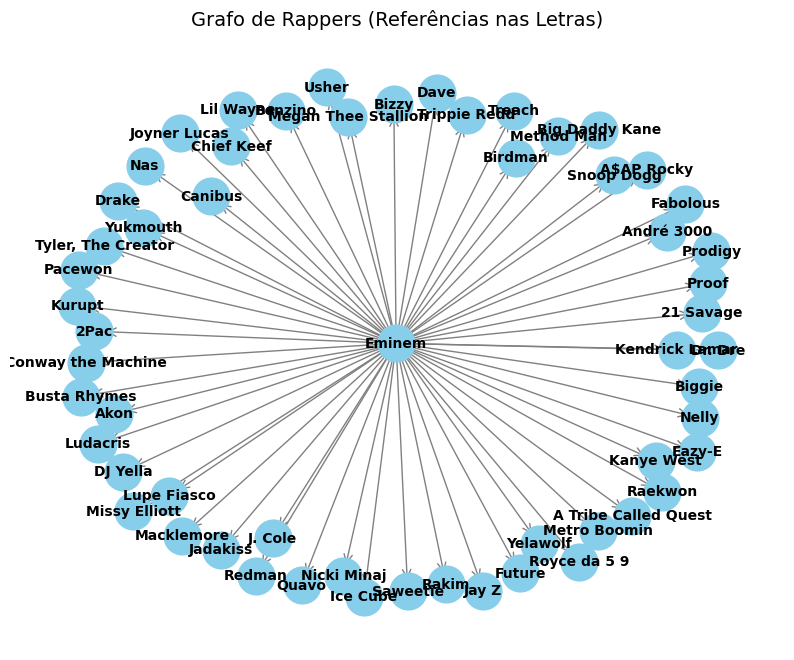

In [105]:
# Visualizando o grafo
plt.figure(figsize=(10, 8))

# Layout para o grafo
pos = nx.spring_layout(G, seed=42)  # Usando spring layout para melhor visualização

# Desenhando os nós e arestas
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=15, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")

# Exibindo o grafo
plt.title("Grafo de Rappers (Referências nas Letras)", fontsize=14)
plt.axis("off")
plt.show()
